In [1]:
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn import svm
from scipy import stats
from sklearn.decomposition import PCA

In [2]:
FEATURE_INDEX = [x for x in range(57)]
LABEL_INDEX = 57

In [3]:
dataset = pd.read_csv(filepath_or_buffer='./spambase.csv', header = None)

print(len(dataset))
dataset.drop_duplicates()
print(len(dataset))

4601
4601


In [4]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


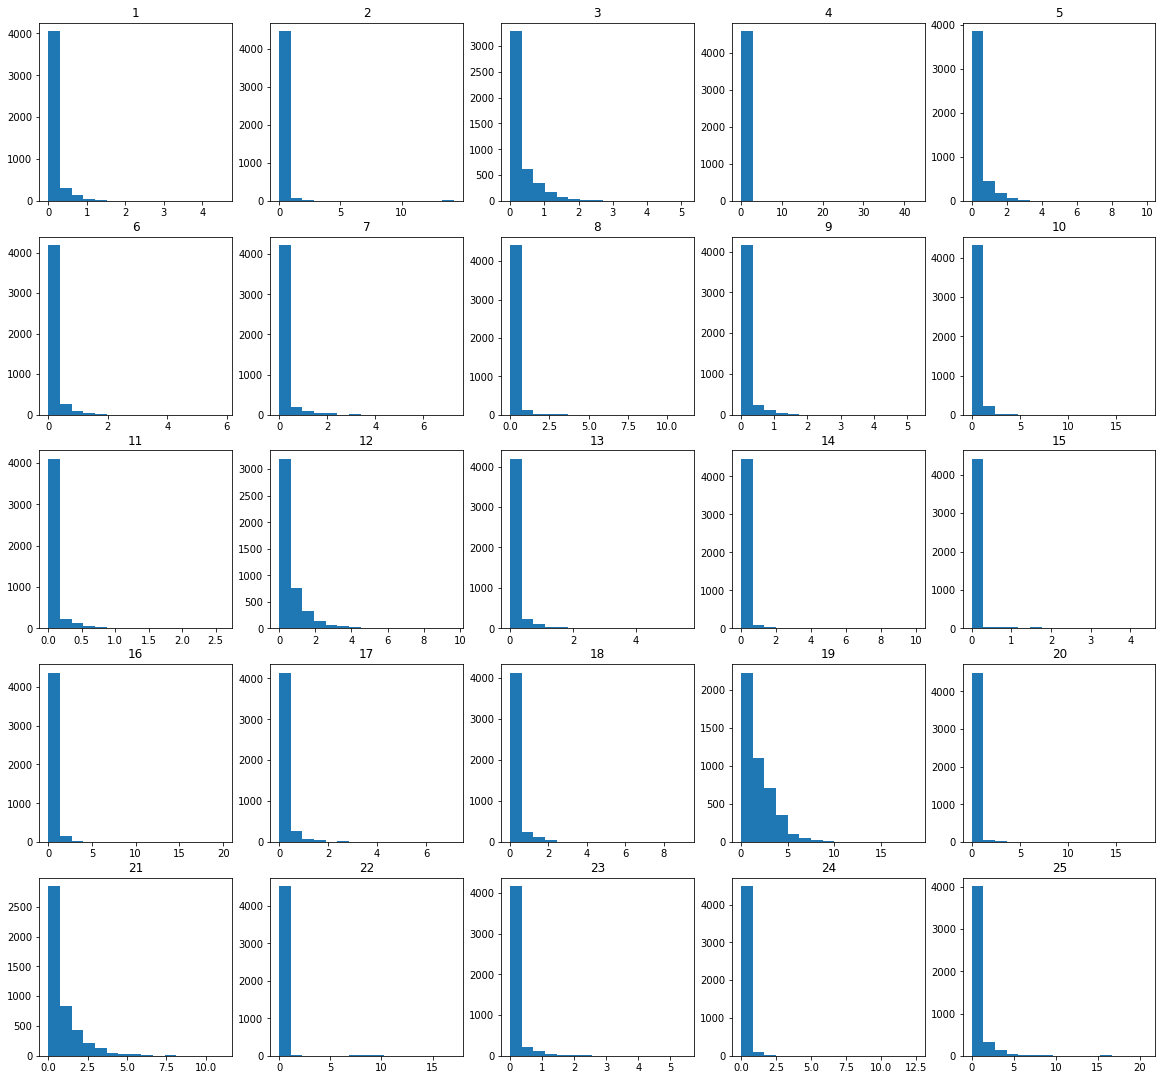

In [5]:
plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.hist(dataset[i], bins = 15) # получаем 15 ячеек на гистограмме
    plt.title(i+1)
plt.savefig('pretreatment/hist1.png', bbox_inches='tight')

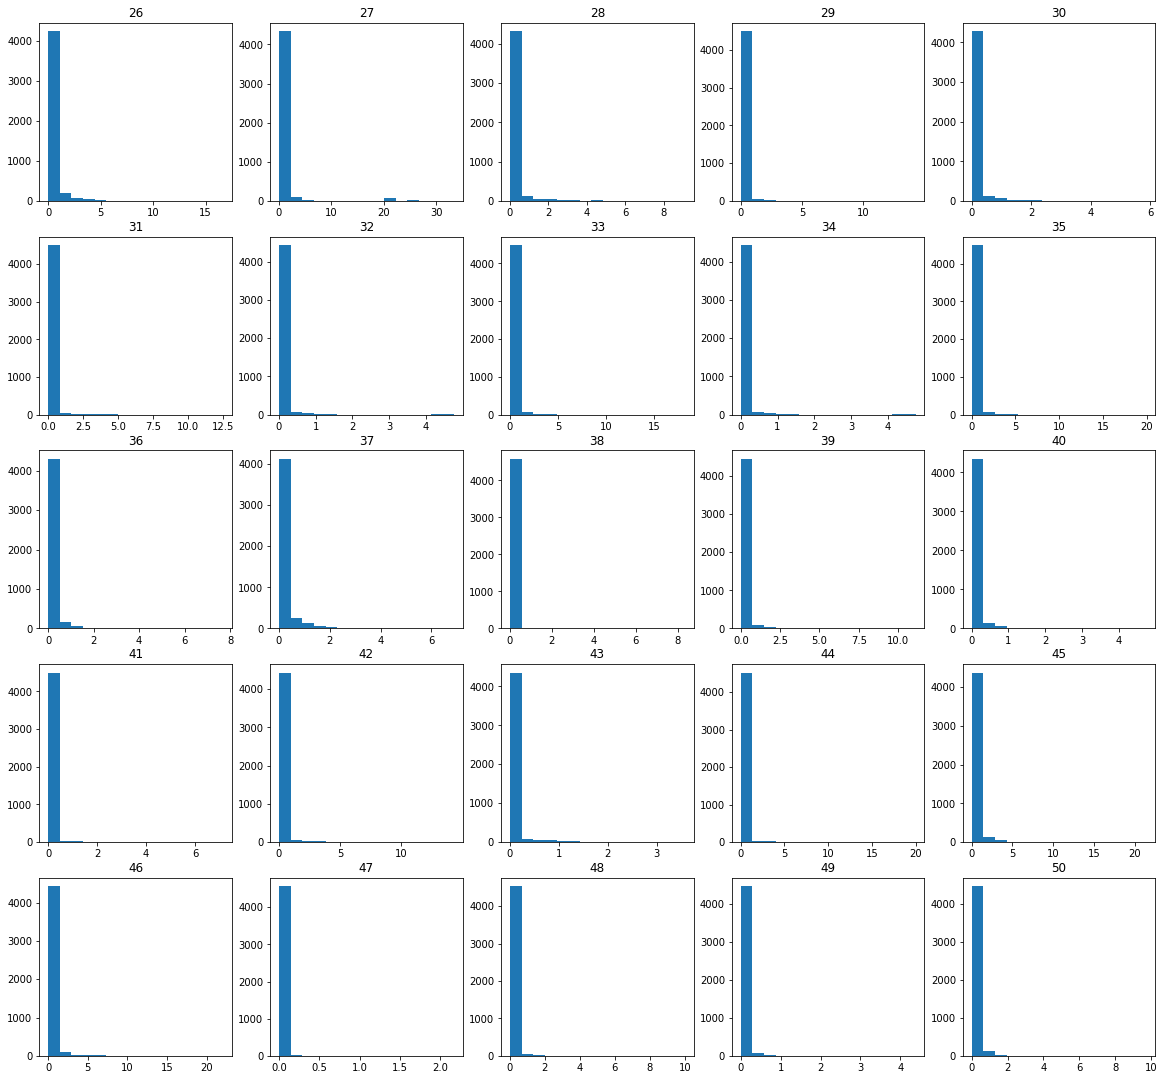

In [6]:
plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.hist(dataset[i + 25], bins = 15) # получаем 15 ячеек на гистограмме
    plt.title(i+26)
plt.savefig('pretreatment/hist2.png', bbox_inches='tight')

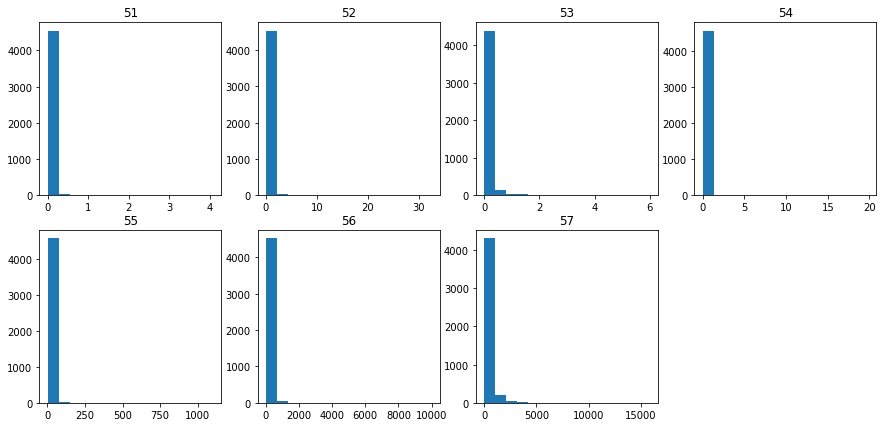

In [7]:
plt.figure(figsize = (15, 7))
for i in range(7):
    plt.subplot(2, 4, i+1)
    plt.hist(dataset[i + 50], bins = 15)
    plt.title(i + 51)
plt.savefig('pretreatment/hist3.png', bbox_inches='tight')

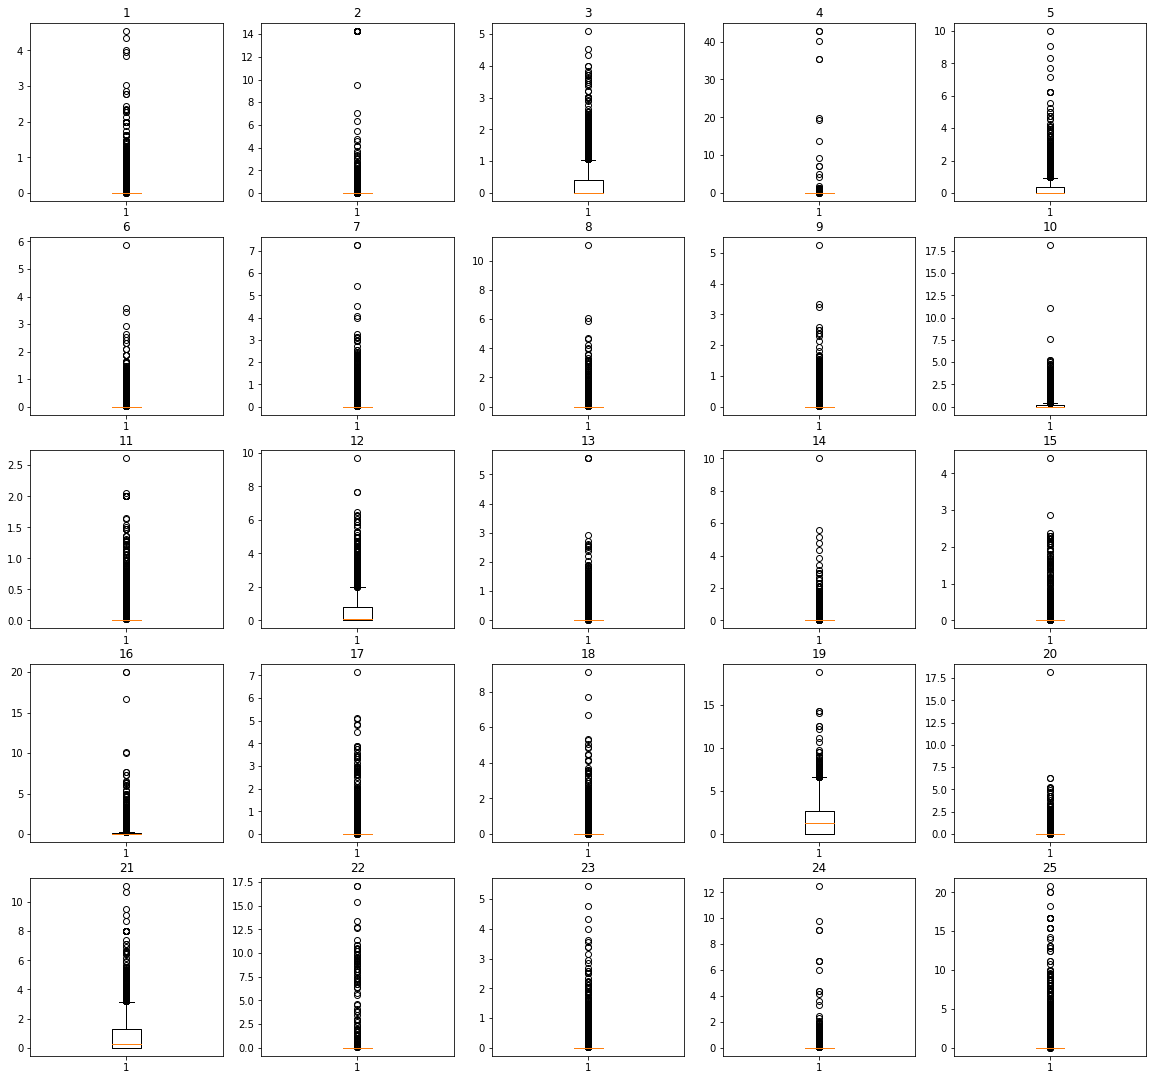

In [8]:
plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.boxplot(dataset[i])
    plt.title(i+1)
plt.savefig('pretreatment/box1.png', bbox_inches='tight')

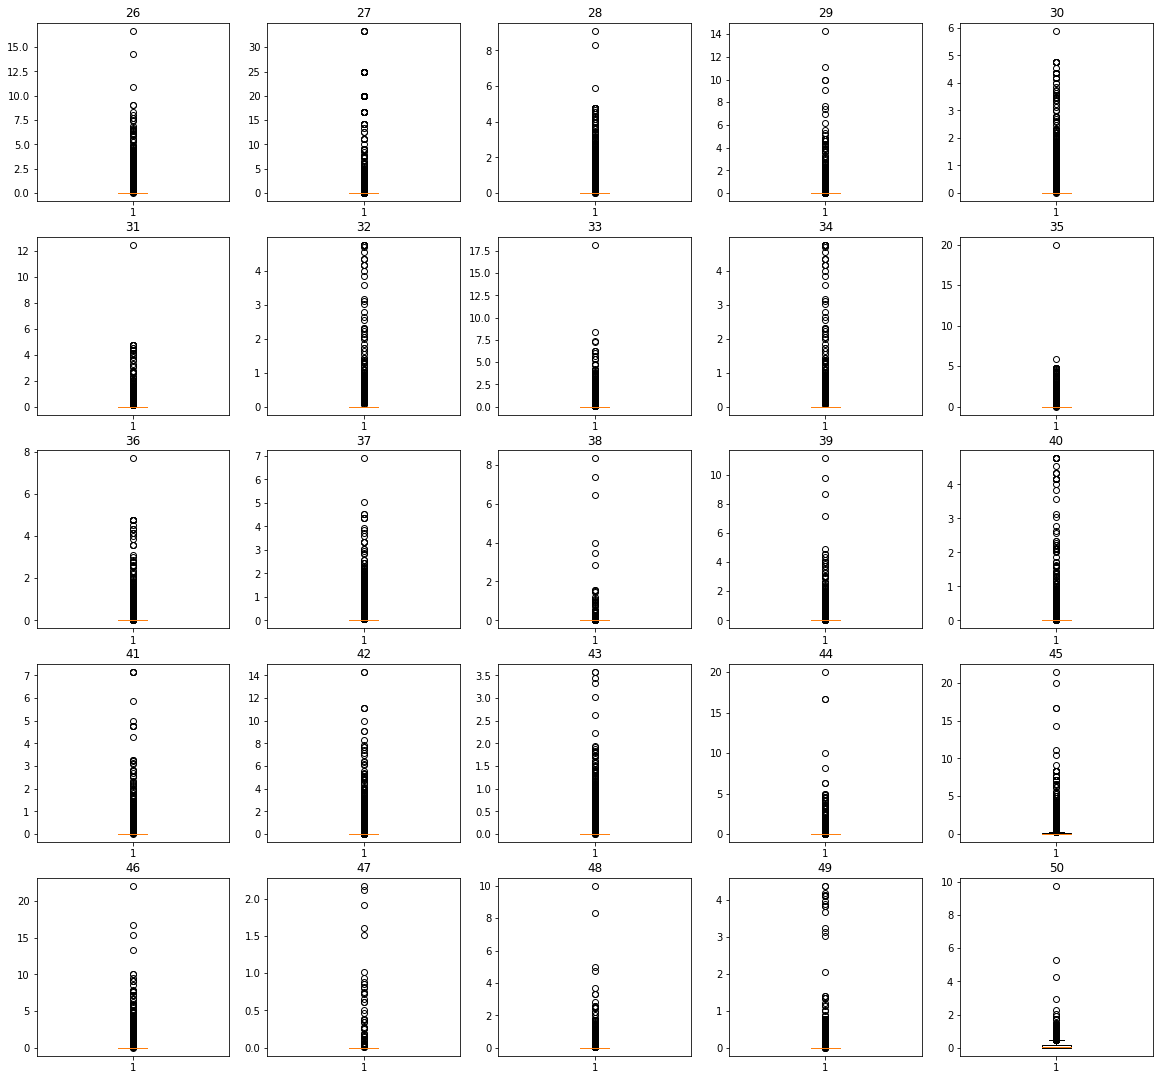

In [9]:
plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.boxplot(dataset[i+25])
    plt.title(i+26)
plt.savefig('pretreatment/box2.png', bbox_inches='tight')

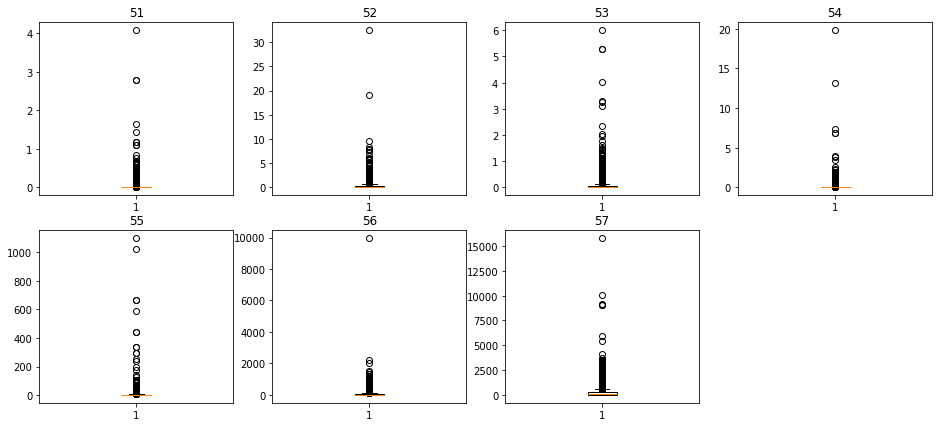

In [10]:
plt.figure(figsize = (16, 7))
for i in range(7):
    plt.subplot(2, 4, i+1)
    plt.boxplot(dataset[i+50])
    plt.title(i+51)
plt.savefig('pretreatment/box3.png', bbox_inches='tight')

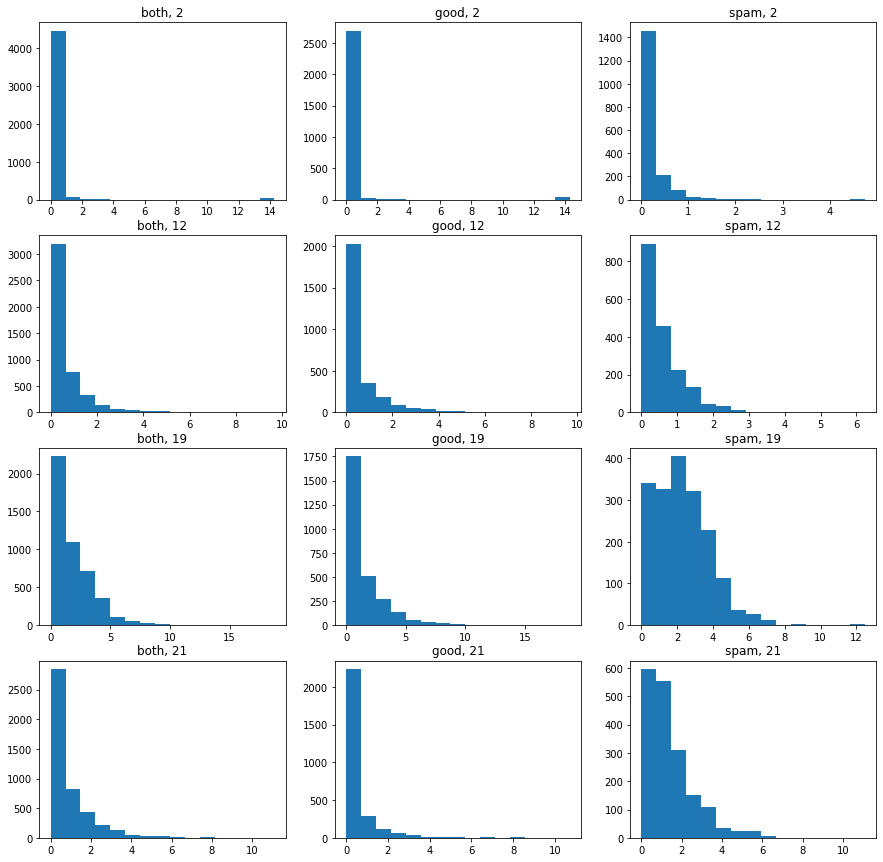

In [11]:
RESPECTIVE_LIST = [2, 12, 19, 21]
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(RESPECTIVE_LIST) * 3):
    plt.subplot(len(RESPECTIVE_LIST), 3, i+1)
    if (i+1) % 3 == 1:
        plt.hist(dataset[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('both, ' + str(RESPECTIVE_LIST[k]))
    if (i+1) % 3 == 2:
        plt.hist((dataset[dataset[57] == 0])[RESPECTIVE_LIST[k] - 1], bins=15) # не спам в 57 столбце помечены 0
        plt.title('good, ' + str(RESPECTIVE_LIST[k]))
    if (i+1) % 3 == 0:
        plt.hist((dataset[dataset[57] == 1])[RESPECTIVE_LIST[k] - 1], bins=15) # спам в 57 столбце помечены 0
        plt.title('spam, ' + str(RESPECTIVE_LIST[k]))
        k += 1
plt.savefig('pretreatment/hist_gengoodspam.png', bbox_inches='tight')

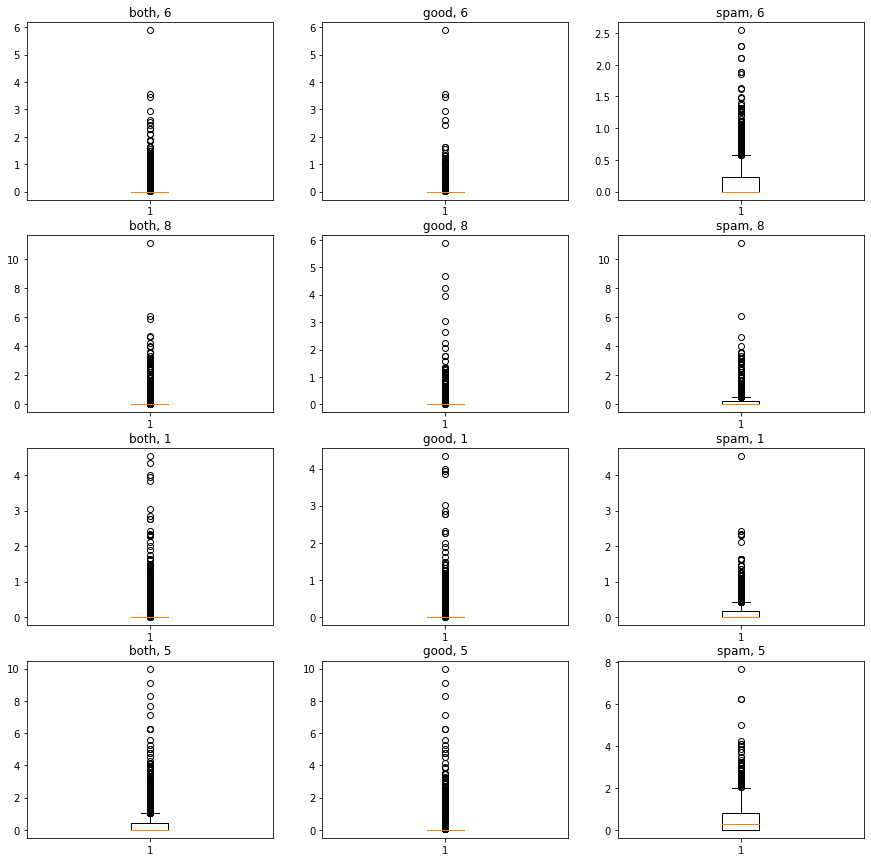

In [39]:
OUTLIER_LIST = [6, 8, 31, 35]
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(OUTLIER_LIST) * 3):
    plt.subplot(len(OUTLIER_LIST), 3, i+1)
    if (i+1) % 3 == 1:
        plt.boxplot(dataset[OUTLIER_LIST[k] - 1])
        plt.title('both, ' + str(OUTLIER_LIST[k]))
    if (i+1) % 3 == 2:
        plt.boxplot((dataset[dataset[57] == 0])[OUTLIER_LIST[k] - 1])
        plt.title('good, ' + str(OUTLIER_LIST[k]))
    if (i+1) % 3 == 0:
        plt.boxplot((dataset[dataset[57] == 1])[OUTLIER_LIST[k] - 1])
        plt.title('spam, ' + str(OUTLIER_LIST[k]))
        k += 1
plt.savefig('pretreatment/outlier_goodbad.png', bbox_inches='tight')

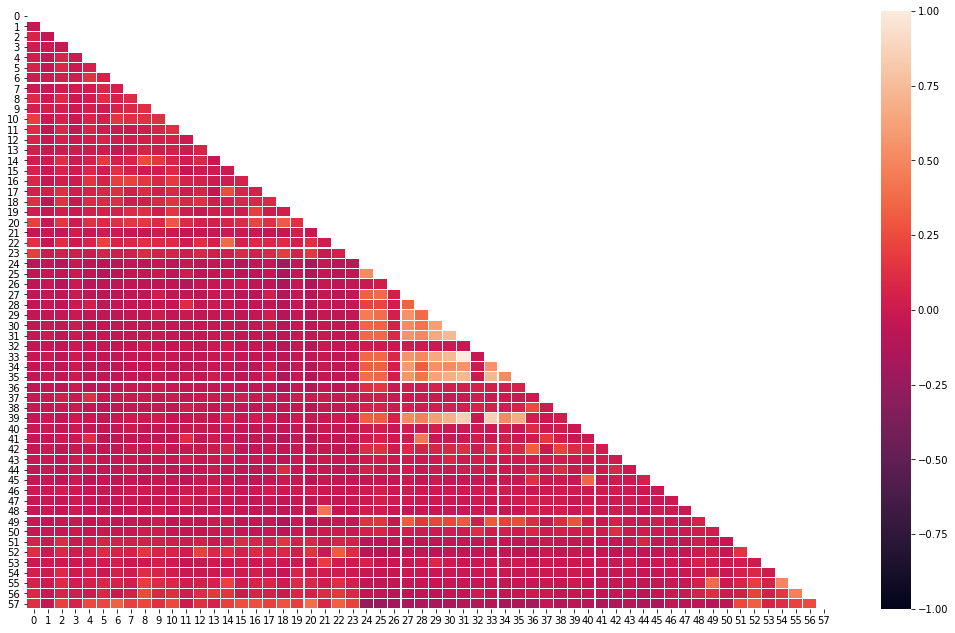

In [13]:
corr_of_dataset = np.array(dataset.corr())
plt.figure(figsize=(18,11))
mask = np.zeros_like(corr_of_dataset) # массив из нулей
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_of_dataset, vmin=-1, vmax=1, linewidths=0.1, mask=mask)
plt.savefig('pretreatment/heat_corr.png', bbox_inches='tight')

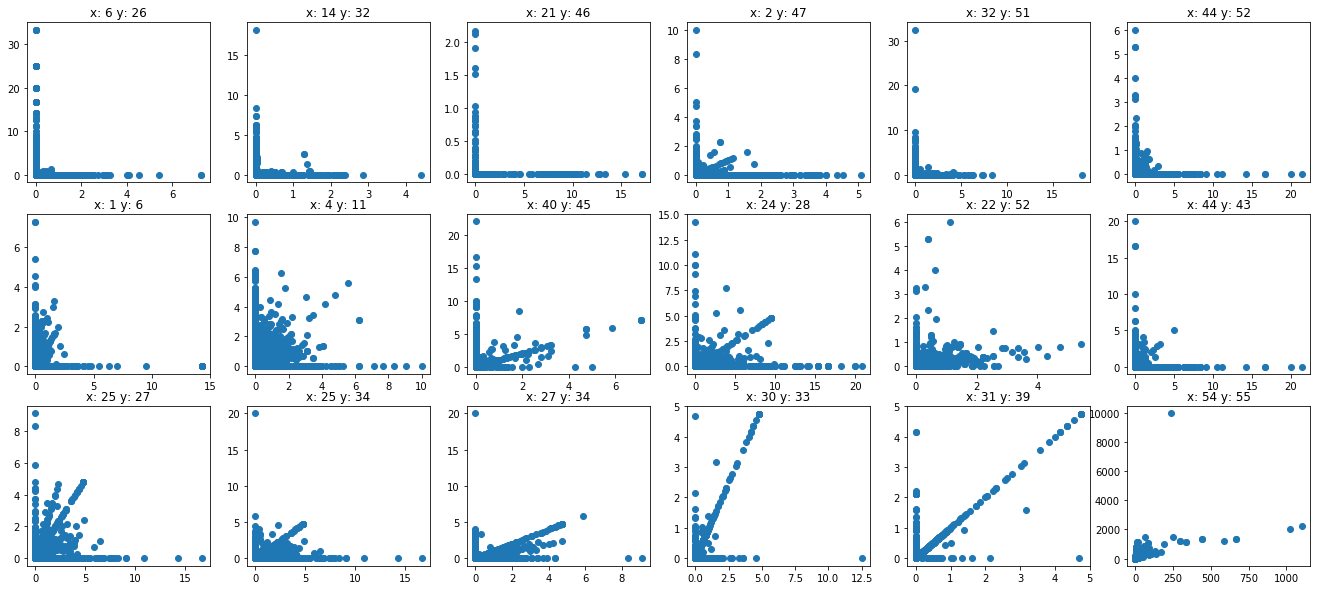

In [14]:
ATR_TO_SCATTER = [[6, 26], [14, 32], [21, 46], [2, 47], [32, 51], [44, 52], #low corr
                  [1, 6], [4, 11], [40,45], [24, 28], [22, 52], [44, 43], #middle corr
                  [25, 27], [25, 34], [27, 34], [30, 33], [31, 39], [54, 55]] #high corr

plt.figure(figsize=(23, 10))
for i in range(len(ATR_TO_SCATTER)):
    plt.subplot(3, 6, i+1)
    plt.scatter(dataset[ATR_TO_SCATTER[i][0]], dataset[ATR_TO_SCATTER[i][1]])
    plt.title('x: '+str(ATR_TO_SCATTER[i][0])+' y: '+str(ATR_TO_SCATTER[i][1]))
plt.savefig('pretreatment/scatter_diag.png', bbox_inches='tight')

In [15]:
dataset.drop_duplicates(inplace = True)

In [16]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [17]:
clf = svm.OneClassSVM(gamma='auto')
clf.fit(dataset[FEATURE_INDEX])

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
            max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

In [18]:
OUTLIER_FRACTION = 0.05
dist_to_border = clf.decision_function(dataset[FEATURE_INDEX]).ravel() # расстояние до гиперплоскости
threshold = stats.scoreatpercentile(dist_to_border,
            100 * OUTLIER_FRACTION) # считаем квантиль на уровне 0,05
is_inlier = dist_to_border > threshold

(array([170.,   7.,   8.,   6.,   3.,   2.,   2.,   0.,   4.,   1.,   2.,
          1.,   1.,   2.,   3.]),
 array([-5.35234754, -5.3519288 , -5.35151006, -5.35109132, -5.35067259,
        -5.35025385, -5.34983511, -5.34941637, -5.34899764, -5.3485789 ,
        -5.34816016, -5.34774143, -5.34732269, -5.34690395, -5.34648521,
        -5.34606648]),
 <a list of 15 Patch objects>)

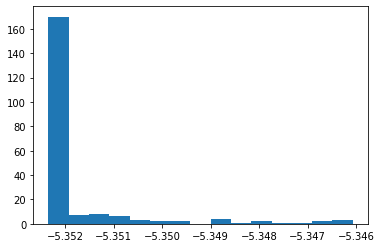

In [19]:
plt.hist(dist_to_border[is_inlier == False], bins = 15) 

In [20]:
dataset_outlier = dataset[is_inlier == False]
dataset_inlier = dataset[is_inlier == True]
print('5%', len(dataset)*0.05)
print('95%', len(dataset)*0.95)
print('Outlier', len(dataset_outlier))
print('Inlier', len(dataset_inlier))
dataset_inlier.head()

5% 210.5
95% 3999.5
Outlier 212
Inlier 3998


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.137,0.0,0.137,0.00,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.135,0.0,0.135,0.00,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.223,0.0,0.000,0.00,0.000,3.000,15,54,1


In [21]:
dataset.notnull().count()

0     4210
1     4210
2     4210
3     4210
4     4210
5     4210
6     4210
7     4210
8     4210
9     4210
10    4210
11    4210
12    4210
13    4210
14    4210
15    4210
16    4210
17    4210
18    4210
19    4210
20    4210
21    4210
22    4210
23    4210
24    4210
25    4210
26    4210
27    4210
28    4210
29    4210
30    4210
31    4210
32    4210
33    4210
34    4210
35    4210
36    4210
37    4210
38    4210
39    4210
40    4210
41    4210
42    4210
43    4210
44    4210
45    4210
46    4210
47    4210
48    4210
49    4210
50    4210
51    4210
52    4210
53    4210
54    4210
55    4210
56    4210
57    4210
dtype: int64

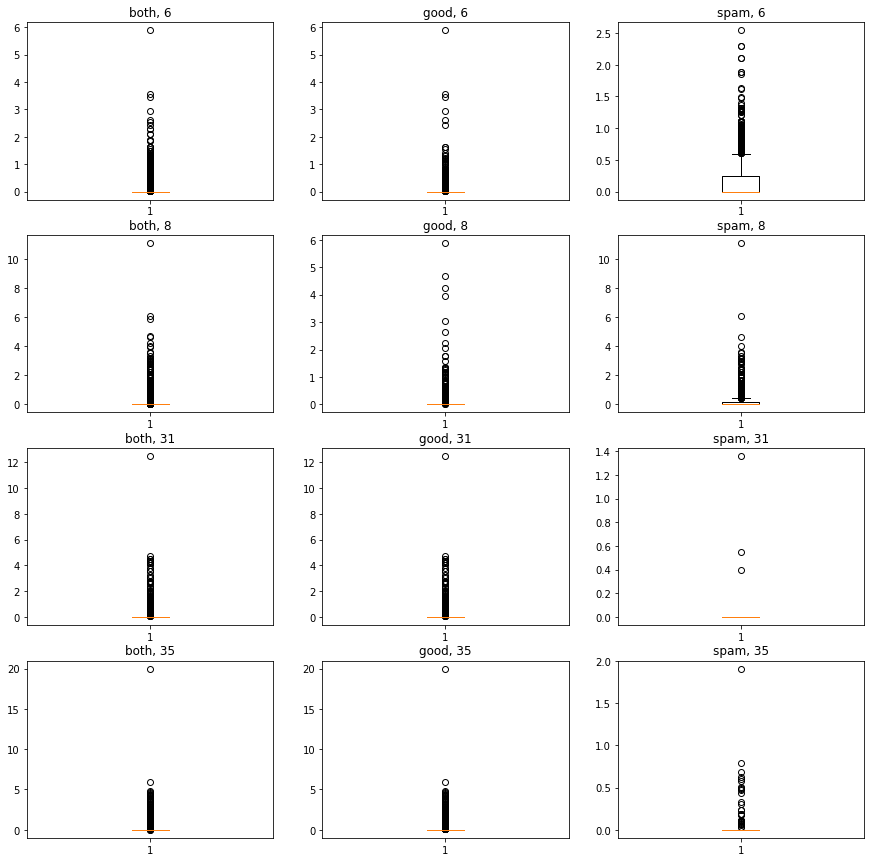

In [22]:
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(OUTLIER_LIST) * 3):
    plt.subplot(len(OUTLIER_LIST), 3, i+1)
    if (i+1) % 3 == 1:
        plt.boxplot(dataset_inlier[OUTLIER_LIST[k] - 1])
        plt.title('both, ' + str(OUTLIER_LIST[k]))
    if (i+1) % 3 == 2:
        plt.boxplot((dataset_inlier[dataset_inlier[57] == 0])[OUTLIER_LIST[k] - 1])
        plt.title('good, ' + str(OUTLIER_LIST[k]))
    if (i+1) % 3 == 0:
        plt.boxplot((dataset_inlier[dataset_inlier[57] == 1])[OUTLIER_LIST[k] - 1])
        plt.title('spam, ' + str(OUTLIER_LIST[k]))
        k += 1
plt.savefig('pretreatment/after_svm_outlier_goodbad.png', bbox_inches='tight')

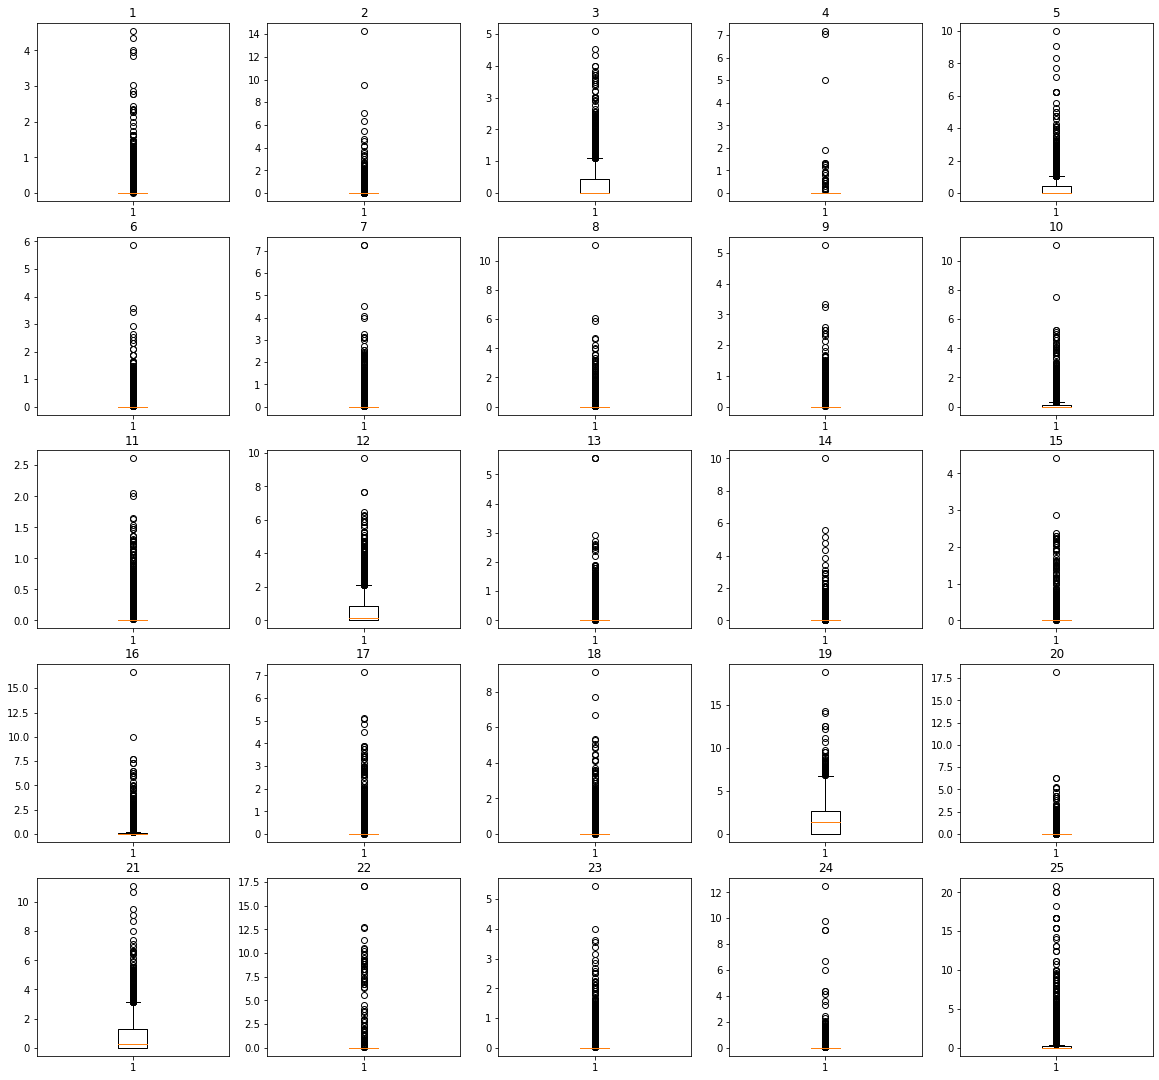

In [23]:
plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.boxplot(dataset_inlier[i])
    plt.title(i+1)
plt.savefig('pretreatment/aft_box1.png', bbox_inches='tight')

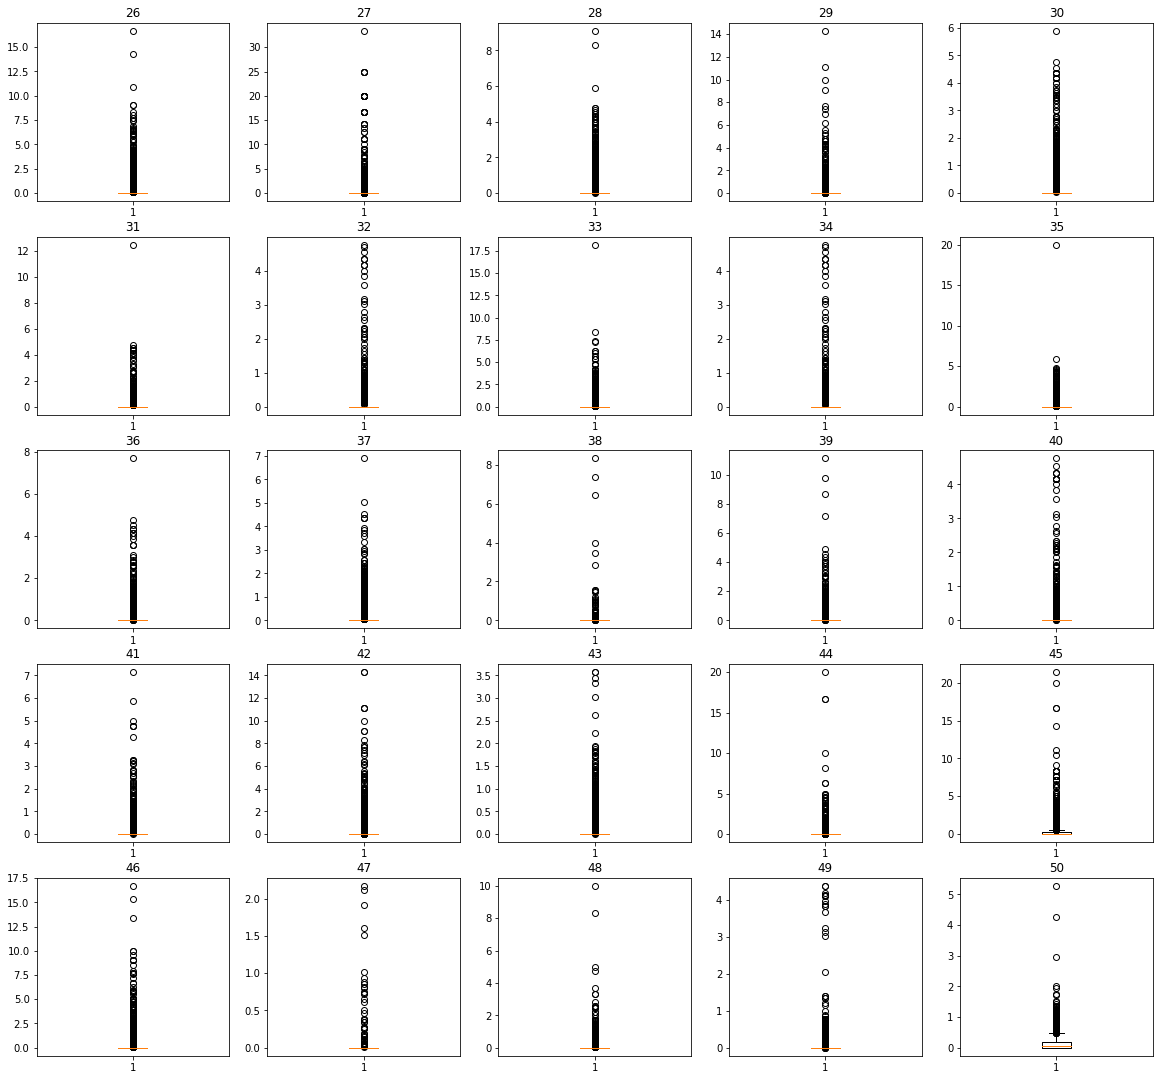

In [24]:
plt.figure(figsize = (20, 19))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.boxplot(dataset_inlier[i + 25])
    plt.title(i + 26)
plt.savefig('pretreatment/aft_box2.png', bbox_inches='tight')

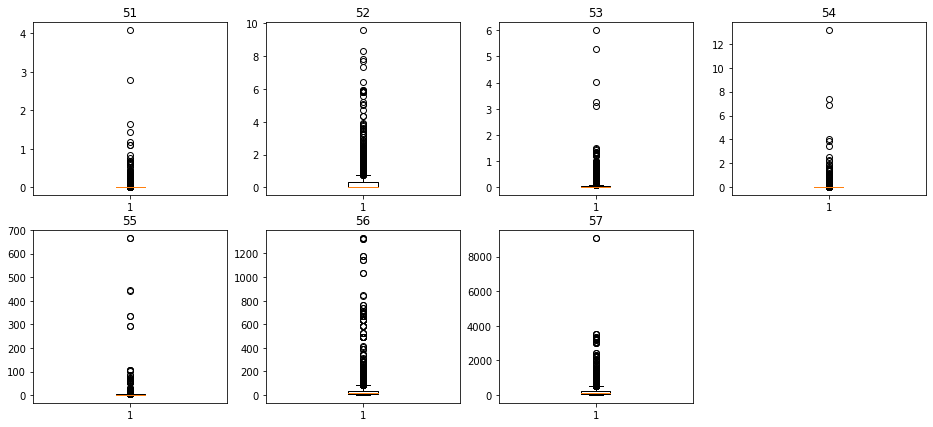

In [25]:
plt.figure(figsize = (16, 7))
for i in range(7):
    plt.subplot(2, 4, i+1)
    plt.boxplot(dataset_inlier[i + 50])
    plt.title(i + 51)
plt.savefig('pretreatment/aft_box3.png', bbox_inches='tight')

In [26]:
len(dataset_inlier)

3998

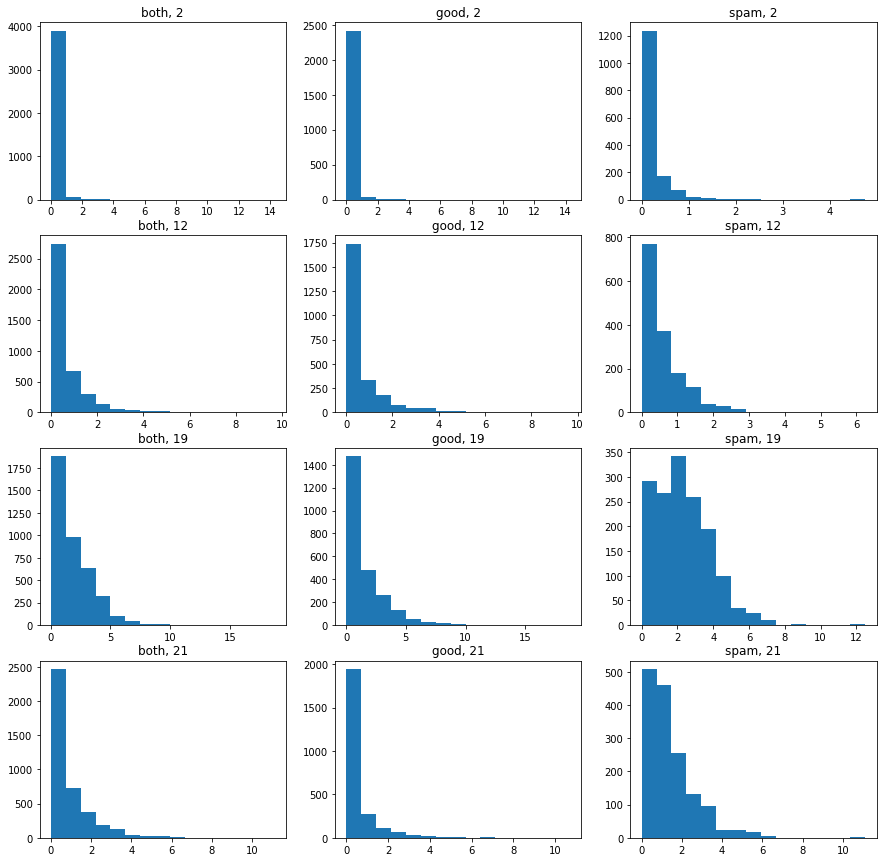

In [27]:
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(RESPECTIVE_LIST) * 3):
    plt.subplot(len(RESPECTIVE_LIST), 3, i+1)
    if (i+1) % 3 == 1:
        plt.hist(dataset_inlier[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('both, ' + str(RESPECTIVE_LIST[k]))
    if (i+1) % 3 == 2:
        plt.hist((dataset_inlier[dataset_inlier[57] == 0])[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('good, ' + str(RESPECTIVE_LIST[k]))
    if (i+1) % 3 == 0:
        plt.hist((dataset_inlier[dataset_inlier[57] == 1])[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('spam, ' + str(RESPECTIVE_LIST[k]))
        k += 1
plt.savefig('pretreatment/after_svm_hist_gengoodspam.png', bbox_inches='tight')

In [28]:
dataset_inlier.loc[:, FEATURE_INDEX] = preprocessing.minmax_scale(dataset_inlier.loc[:, FEATURE_INDEX], feature_range=(0.1, 0.9))
# преобразование данных
dataset_inlier.head()

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.100000,0.135854,0.200392,0.1,0.1256,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.1,0.100000,0.1,0.165003,0.100000,0.100000,0.103311,0.136036,0.124381,1
1,0.137004,0.115686,0.178431,0.1,0.1112,0.138095,0.123109,0.105041,0.100000,0.167687,...,0.1,0.120011,0.1,0.131081,0.123988,0.102925,0.104942,0.160060,0.190395,1
3,0.100000,0.100000,0.100000,0.1,0.1504,0.100000,0.134113,0.145365,0.147148,0.145365,...,0.1,0.120769,0.1,0.111446,0.100000,0.100000,0.103047,0.123423,0.116724,1
4,0.100000,0.100000,0.100000,0.1,0.1504,0.100000,0.134113,0.145365,0.147148,0.145365,...,0.1,0.120466,0.1,0.111279,0.100000,0.100000,0.103047,0.123423,0.116724,1
5,0.100000,0.100000,0.100000,0.1,0.2480,0.100000,0.100000,0.233213,0.100000,0.100000,...,0.1,0.133807,0.1,0.100000,0.100000,0.100000,0.102402,0.108408,0.104665,1


In [29]:
dataset_inlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3998 non-null   float64
 1   1       3998 non-null   float64
 2   2       3998 non-null   float64
 3   3       3998 non-null   float64
 4   4       3998 non-null   float64
 5   5       3998 non-null   float64
 6   6       3998 non-null   float64
 7   7       3998 non-null   float64
 8   8       3998 non-null   float64
 9   9       3998 non-null   float64
 10  10      3998 non-null   float64
 11  11      3998 non-null   float64
 12  12      3998 non-null   float64
 13  13      3998 non-null   float64
 14  14      3998 non-null   float64
 15  15      3998 non-null   float64
 16  16      3998 non-null   float64
 17  17      3998 non-null   float64
 18  18      3998 non-null   float64
 19  19      3998 non-null   float64
 20  20      3998 non-null   float64
 21  21      3998 non-null   float64
 22  

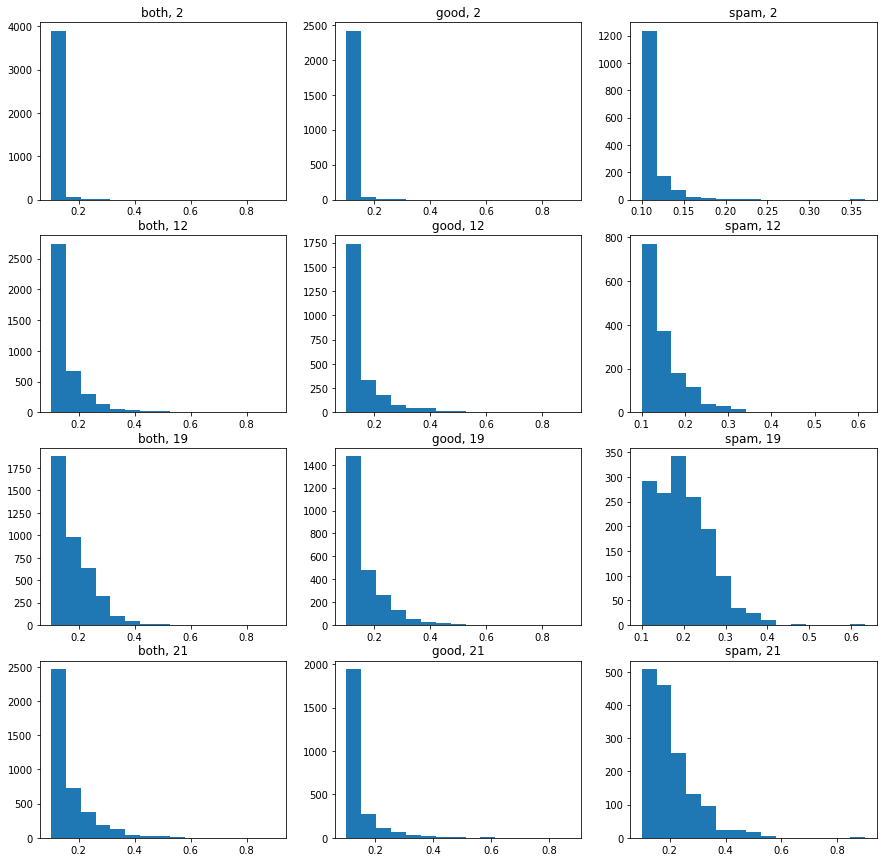

In [30]:
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(RESPECTIVE_LIST) * 3):
    plt.subplot(len(RESPECTIVE_LIST), 3, i+1)
    if (i+1) % 3 == 1:
        plt.hist(dataset_inlier[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('both, ' + str(RESPECTIVE_LIST[k]))
    if (i+1) % 3 == 2:
        plt.hist((dataset_inlier[dataset_inlier[57] == 0])[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('good, ' + str(RESPECTIVE_LIST[k]))
    if (i+1) % 3 == 0:
        plt.hist((dataset_inlier[dataset_inlier[57] == 1])[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('spam, ' + str(RESPECTIVE_LIST[k]))
        k += 1
plt.savefig('pretreatment/scale_hist_gengoodspam.png', bbox_inches='tight')

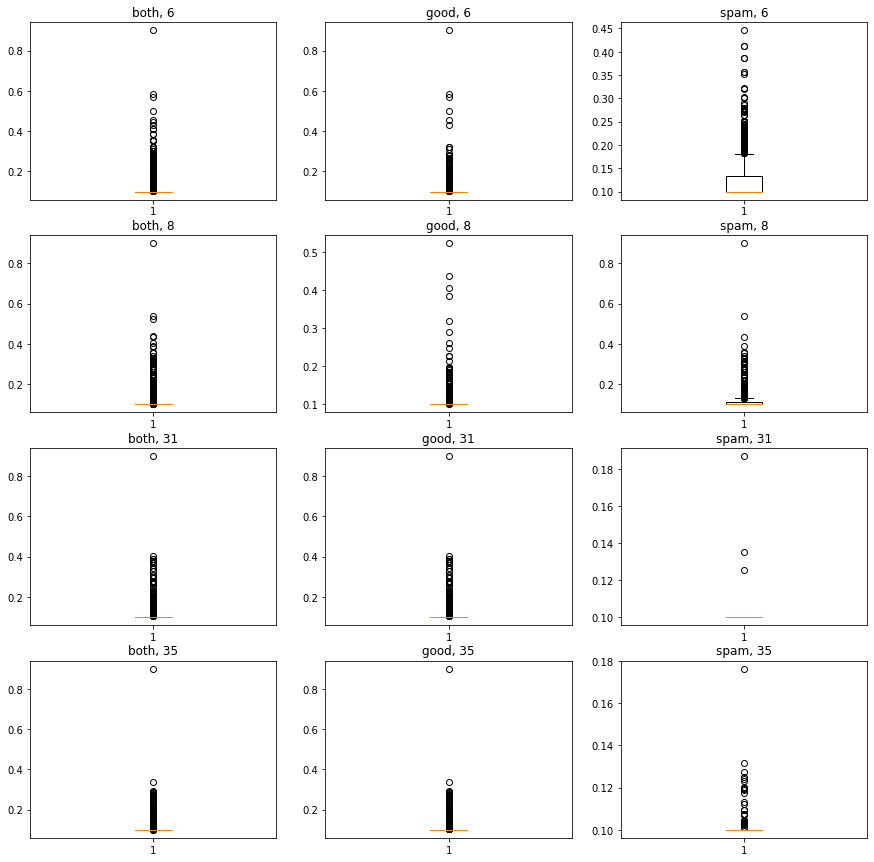

In [31]:
k = 0
plt.figure(figsize=(15, 15))
for i in range(len(OUTLIER_LIST) * 3):
    plt.subplot(len(OUTLIER_LIST), 3, i+1)
    if (i+1) % 3 == 1:
        plt.boxplot(dataset_inlier[OUTLIER_LIST[k] - 1])
        plt.title('both, ' + str(OUTLIER_LIST[k]))
    if (i+1) % 3 == 2:
        plt.boxplot((dataset_inlier[dataset_inlier[57] == 0])[OUTLIER_LIST[k] - 1])
        plt.title('good, ' + str(OUTLIER_LIST[k]))
    if (i+1) % 3 == 0:
        plt.boxplot((dataset_inlier[dataset_inlier[57] == 1])[OUTLIER_LIST[k] - 1])
        plt.title('spam, ' + str(OUTLIER_LIST[k]))
        k += 1
plt.savefig('pretreatment/scale_outlier_goodbad.png', bbox_inches='tight')

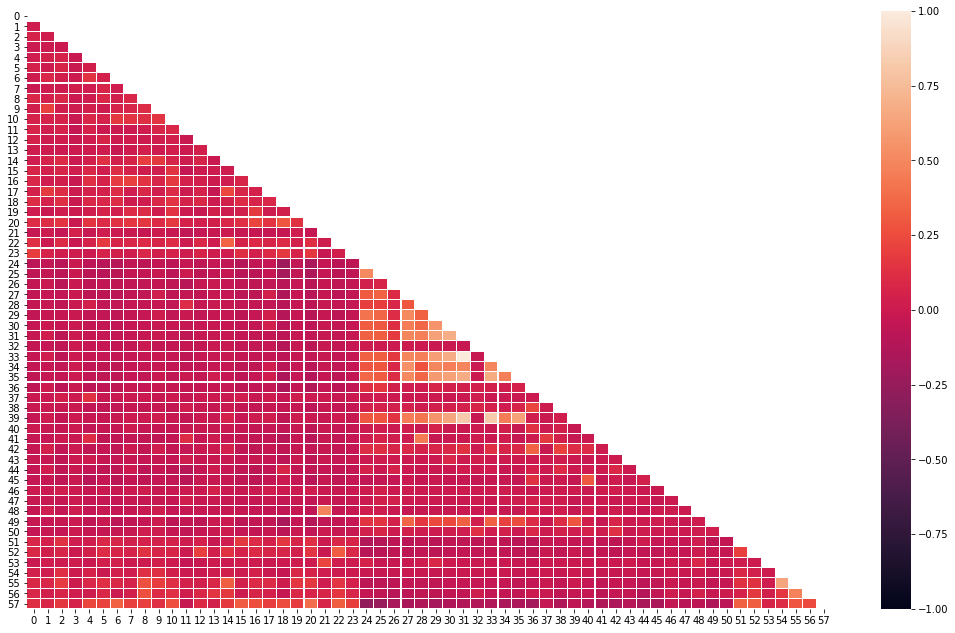

In [32]:
corr_of_dataset_inlier = np.array(dataset_inlier.corr())
plt.figure(figsize=(18,11))
mask = np.zeros_like(corr_of_dataset_inlier)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_of_dataset_inlier, vmin=-1, vmax=1, linewidths=0.1, mask=mask)
plt.savefig('pretreatment/heat_corr_clear.png', bbox_inches='tight')

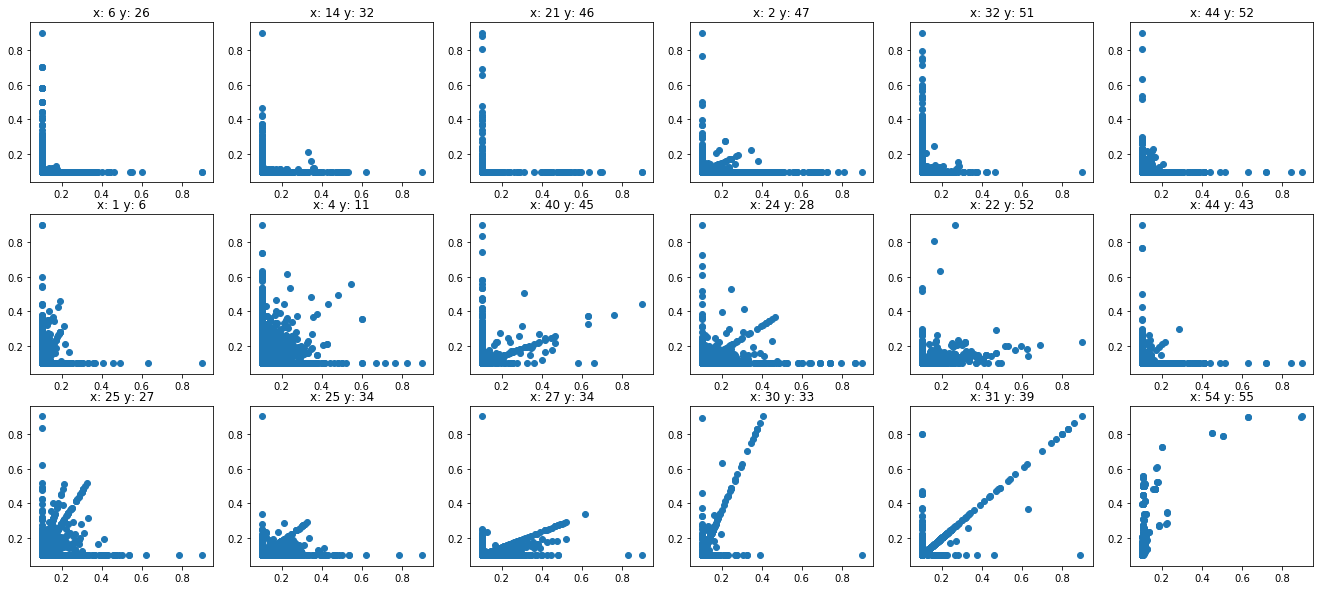

In [33]:
ATR_TO_SCATTER = [[6, 26], [14, 32], [21, 46], [2, 47], [32, 51], [44, 52], #low corr
                  [1, 6], [4, 11], [40,45], [24, 28], [22, 52], [44, 43], #middle corr
                  [25, 27], [25, 34], [27, 34], [30, 33], [31, 39], [54, 55]] #high corr

plt.figure(figsize=(23, 10))
for i in range(len(ATR_TO_SCATTER)):
    plt.subplot(3, 6, i+1)
    plt.scatter(dataset_inlier[ATR_TO_SCATTER[i][0]], dataset_inlier[ATR_TO_SCATTER[i][1]])
    plt.title('x: '+str(ATR_TO_SCATTER[i][0])+' y: '+str(ATR_TO_SCATTER[i][1]))
plt.savefig('pretreatment/scale_scatter_diag.png', bbox_inches='tight')

In [34]:
end_dataset = PCA(n_components=10).fit_transform(dataset_inlier[FEATURE_INDEX]) # сокращение признаков
end_dataset = pd.DataFrame(end_dataset)

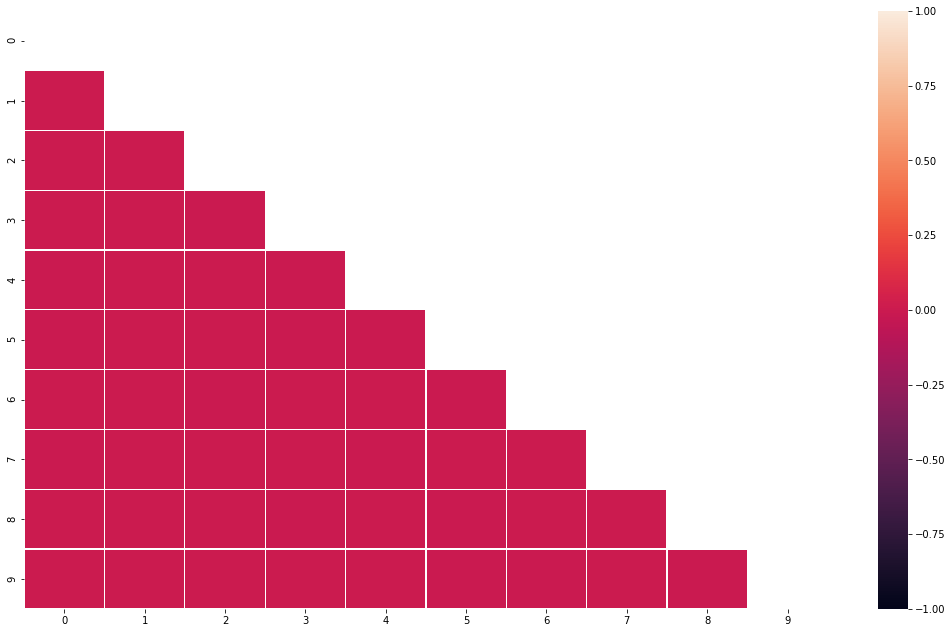

In [35]:
corr_end_dataset = end_dataset.corr()
plt.figure(figsize=(18,11))
mask = np.zeros_like(corr_end_dataset)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_end_dataset, vmin=-1, vmax=1, linewidths=0.1, mask=mask)
plt.savefig('pretreatment/heat_corr_features.png', bbox_inches='tight')

In [36]:
end_dataset[50] = np.array(dataset_inlier[57])
FEATURE_INDEX = np.arange(50)
LABEL_INDEX = 50
end_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3998 non-null   float64
 1   1       3998 non-null   float64
 2   2       3998 non-null   float64
 3   3       3998 non-null   float64
 4   4       3998 non-null   float64
 5   5       3998 non-null   float64
 6   6       3998 non-null   float64
 7   7       3998 non-null   float64
 8   8       3998 non-null   float64
 9   9       3998 non-null   float64
 10  50      3998 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 343.7 KB


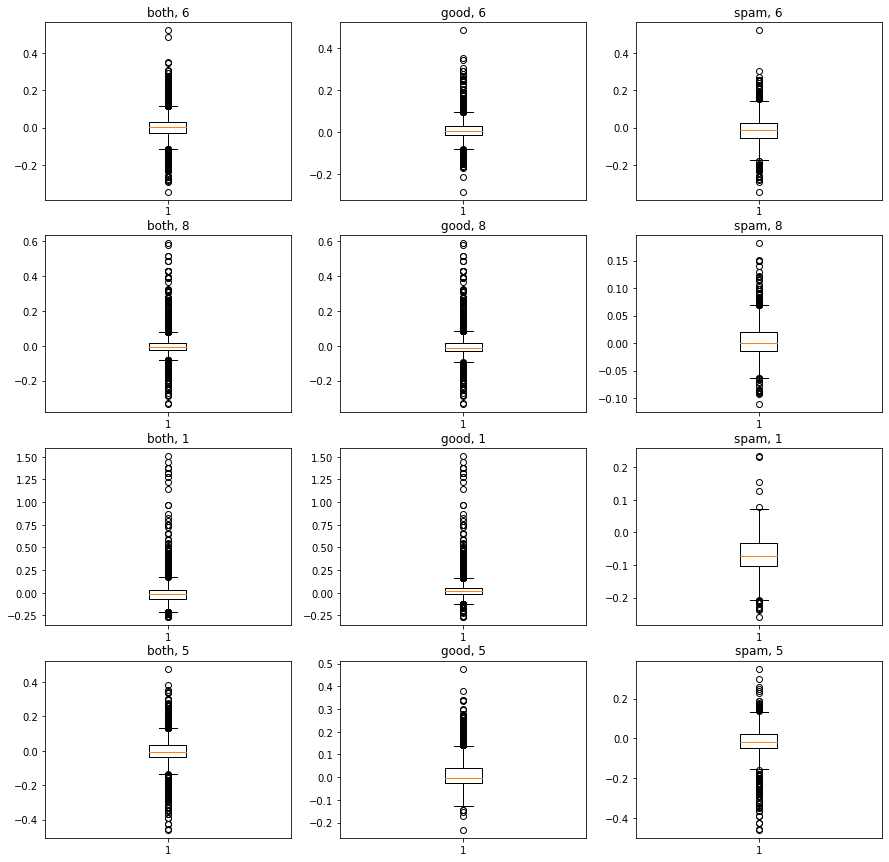

In [40]:
k = 0
OUTLIER_LIST = [6, 8, 1, 5]
plt.figure(figsize=(15, 15))
for i in range(len(OUTLIER_LIST) * 3):
    plt.subplot(len(OUTLIER_LIST), 3, i+1)
    if (i+1) % 3 == 1:
        plt.boxplot(end_dataset[OUTLIER_LIST[k] - 1])
        plt.title('both, ' + str(OUTLIER_LIST[k]))
    if (i+1) % 3 == 2:
        plt.boxplot((end_dataset[end_dataset[LABEL_INDEX] == 0])[OUTLIER_LIST[k] - 1])
        plt.title('good, ' + str(OUTLIER_LIST[k]))
    if (i+1) % 3 == 0:
        plt.boxplot((end_dataset[end_dataset[LABEL_INDEX] == 1])[OUTLIER_LIST[k] - 1])
        plt.title('spam, ' + str(OUTLIER_LIST[k]))
        k += 1
plt.savefig('pretreatment/end_outlier_goodbad.png', bbox_inches='tight')

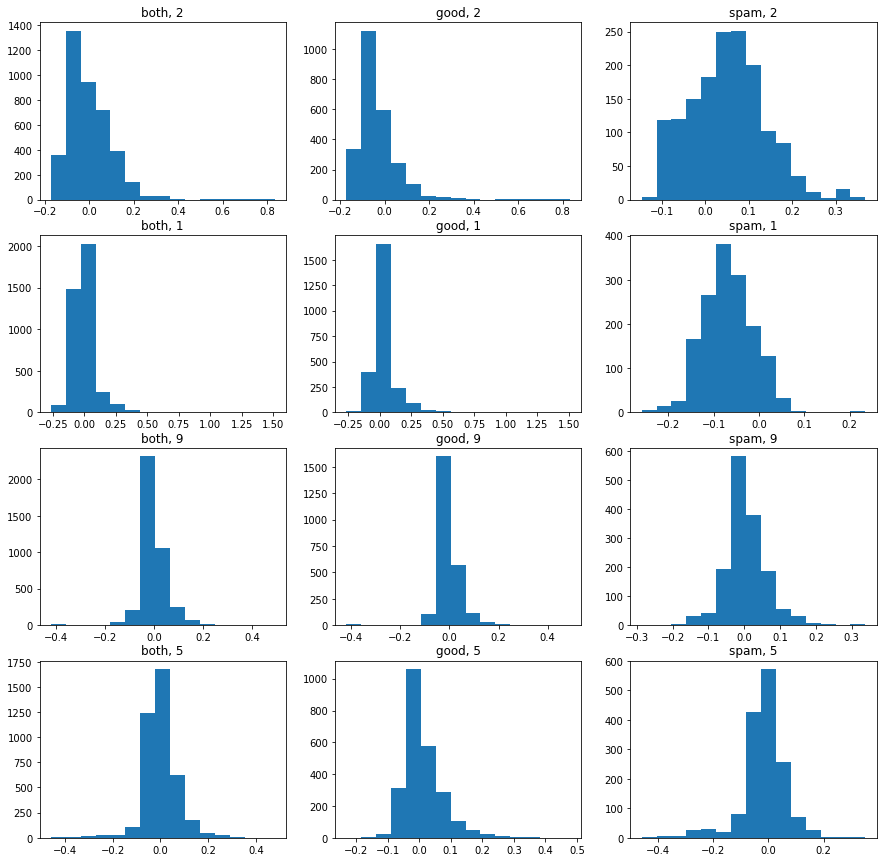

In [41]:
k = 0
RESPECTIVE_LIST = [2, 1, 9, 5]
plt.figure(figsize=(15, 15))
for i in range(len(RESPECTIVE_LIST) * 3):
    plt.subplot(len(RESPECTIVE_LIST), 3, i+1)
    if (i+1) % 3 == 1:
        plt.hist(end_dataset[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('both, ' + str(RESPECTIVE_LIST[k]))
    if (i+1) % 3 == 2:
        plt.hist((end_dataset[end_dataset[LABEL_INDEX] == 0])[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('good, ' + str(RESPECTIVE_LIST[k]))
    if (i+1) % 3 == 0:
        plt.hist((end_dataset[end_dataset[LABEL_INDEX] == 1])[RESPECTIVE_LIST[k] - 1], bins=15)
        plt.title('spam, ' + str(RESPECTIVE_LIST[k]))
        k += 1
plt.savefig('pretreatment/end_scale_hist_gengoodspam.png', bbox_inches='tight')

In [ ]:

ATR_TO_SCATTER = [[6, 26], [14, 32], [21, 46], [2, 47], [44, 45], #low corr
                  [1, 6], [4, 11], [11, 19], [15, 16], [37, 35], #middle corr
                  [25, 27], [25, 34], [27, 34], [30, 33], [32, 33]] #high corr
plt.figure(figsize=(23, 15))
for i in range(len(ATR_TO_SCATTER)):
    plt.subplot(4, 5, i+1)
    plt.scatter((end_dataset[FEATURE_INDEX])[ATR_TO_SCATTER[i][0]], (end_dataset[FEATURE_INDEX])[ATR_TO_SCATTER[i][1]])
    plt.title('x: '+str(ATR_TO_SCATTER[i][0])+' y: '+str(ATR_TO_SCATTER[i][1]))
plt.savefig('pretreatment/end_scale_scatter_diag.png', bbox_inches='tight')


In [42]:
end_dataset.to_csv('pretreatmented_data.csv', header=False, index=False)